## EXPLORATORY DATA ANALYSIS CARBON EMISSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
import optuna
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

In [3]:
path = '/kaggle/input/carbon-emissions/Carbon_Emissions/'
train = pd.read_csv(path + 'Train.csv')
test = pd.read_csv(path + 'Test.csv')
sample_submission = pd.read_csv(path + 'SampleSubmission.csv')
display(train.head())

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.73_28.77_2019_1    -23.73      28.77  2019        1   
1  ID_-23.73_28.77_2019_2    -23.73      28.77  2019        2   
2  ID_-23.73_28.77_2019_3    -23.73      28.77  2019        3   
3  ID_-23.73_28.77_2019_4    -23.73      28.77  2019        4   
4  ID_-23.73_28.77_2019_5    -23.73      28.77  2019        5   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000167   
1                                 -0.000155   
2                                 -0.000065   
3                                  0.000152   
4                                  0.000024   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.713172   
1                                      0.812910   
2                                      0.860306   
3                                      0.422284   
4                                      1.004578   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000102   
1                                       -0.000137   
2                                       -0.000062   
3                                        0.000087   
4                                        0.000028   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.223929                            24.939440   
1                       0.080281                            16.624162   
2                       0.161050                           -13.237244   
3                       0.046504                           -13.534653   
4                       0.214246                           -13.475718   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           56.896198                          -89.545030   
1                           31.137265                          -88.956530   
2                           44.441063                          -86.535887   
3                           61.252501                          -80.957632   
4                           30.800774                          -75.277746   

   SulphurDioxide_solar_zenith_angle  \
0                          17.991569   
1                          20.223611   
2                          23.737204   
3                          22.601331   
4                          20.767867   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                       0.000033   
1                                      -0.000067   
2                                      -0.000031   
3                                       0.000031   
4                                       0.000005   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.023408   
1                                 0.024189   
2                                 0.023697   
3                                 0.022360   
4                                 0.023042   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2829.881106                  2583.717282   
1                               2136.614929                  1864.319244   
2                               1907.515503                  1904.701915   
3                               2122.067948                  1696.206336   
4                               1750.011133                  1175.445825   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   835381.851887                            24.227459   
1                   836015.109375                           -14.290228   
2                   835929.146497                             3.862519   
3                   835722.447917                            15.101508   
4                   835931.962500                           -28.068285   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_an

In the description we were told that The places come from different provinces in both train and test so lets confirm that

In [4]:
for df in [train, test]:
    df['location'] = df['latitude'].astype(str) + '_' + df['longitude'].astype(str)
    
display(train.head(2), test.head(2))

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.73_28.77_2019_1    -23.73      28.77  2019        1   
1  ID_-23.73_28.77_2019_2    -23.73      28.77  2019        2   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000167   
1                                 -0.000155   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.713172   
1                                      0.812910   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000102   
1                                       -0.000137   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.223929                            24.939440   
1                       0.080281                            16.624162   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           56.896198                           -89.54503   
1                           31.137265                           -88.95653   

   SulphurDioxide_solar_zenith_angle  \
0                          17.991569   
1                          20.223611   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                       0.000033   
1                                      -0.000067   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.023408   
1                                 0.024189   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2829.881106                  2583.717282   
1                               2136.614929                  1864.319244   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   835381.851887                            24.227459   
1                   836015.109375                           -14.290228   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                           56.937397                          -89.606501   
1                           27.514546                          -90.409693   

   CarbonMonoxide_solar_zenith_angle  \
0                          18.019698   
1                          23.053571   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000057   
1                                   0.000069   

   NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                           0.000016        
1                                           0.000029        

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000041         
1                                           0.000040         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000127   
1                                         0.000131   

   NitrogenDioxide_tropopause_pressure  \
0                          9904.580385   
1                          8935.897092   

   NitrogenDioxide_absorbing_aerosol_index  NitrogenDioxide_cloud_fraction  \
0                                -1.668380                        0.080565   
1                                -1.347168                        0.063770   

   NitrogenDioxide_sensor_altitude  NitrogenDioxide_sensor_azimuth_angle  \
0                    835960.031250                            -13.285625   
1                    835799.541667                             16.624162   

   NitrogenDioxide_sensor_zenith_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            45.229958                           -92.185623   
1                            31.137265                           -88.956530   

   NitrogenDioxide_solar_zenith_angle  \
0                           22.836521   
1                           20.223611   

   Formaldehyde_tropospheric_HCHO_column_number

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.53_27.47_2019_1    -23.53      27.47  2019        1   
1  ID_-23.53_27.47_2019_2    -23.53      27.47  2019        2   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000077   
1                                  0.000181   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.454468   
1                                      0.423171   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000034   
1                                        0.000062   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.114291                           -80.286309   
1                       0.075100                           -17.765690   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           55.548961                          -94.964386   
1                           56.321248                          -89.763833   

   SulphurDioxide_solar_zenith_angle  \
0                          30.229884   
1                          23.313511   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                       0.000015   
1                                       0.000024   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.025937   
1                                 0.025041   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2343.109252                  1303.421296   
1                               2187.909800                   347.591639   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   836310.926686                           -80.525540   
1                   836017.160096                           -56.480581   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                           50.020040                          -94.822642   
1                           35.874919                          -91.053865   

   CarbonMonoxide_solar_zenith_angle  \
0                          29.510213   
1                          24.333551   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000069   
1                                   0.000080   

   NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                           0.000027        
1                                           0.000039        

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000041         
1                                           0.000041         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000153   
1                                         0.000160   

   NitrogenDioxide_tropopause_pressure  \
0                          9662.019782   
1                          8705.951365   

   NitrogenDioxide_absorbing_aerosol_index  NitrogenDioxide_cloud_fraction  \
0                                -1.133541                        0.081843   
1                                -1.237256                        0.042643   

   NitrogenDioxide_sensor_altitude  NitrogenDioxide_sensor_azimuth_angle  \
0                    835956.054688                            -35.601709   
1                    835157.398416                             50.374223   

   NitrogenDioxide_sensor_zenith_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            56.745405                           -92.732373   
1                            55.107811                           -85.736668   

   NitrogenDioxide_solar_zenith_angle  \
0                           24.507811   
1                           14.604684   

   Formaldehyde_tropospheric_HCHO_column_number

In [5]:
set(train.location.unique()).\
    intersection(set(test.location.unique()))

set()

Fair enough they don't come from the same distribution 

In [6]:
train.groupby('location')['year'].min().sort_values().head(10)

location
-23.729999999993534_28.769999999988148    2019
-29.129999999993228_26.26999999998829     2019
-29.129999999993228_26.369999999988284    2019
-29.12999999999323_26.0699999999883       2019
-29.12999999999323_26.169999999988296     2019
-29.12999999999323_26.26999999998829      2019
-29.12999999999323_26.369999999988284     2019
-29.22999999999321_26.0699999999883       2019
-29.129999999993228_26.169999999988296    2019
-29.22999999999321_26.169999999988296     2019
Name: year, dtype: int64

In [7]:
train.groupby('location')['year'].min().sort_values().tail(10)

location
-26.2299999999934_28.36999999998817       2020
-28.529999999993255_21.469999999988563    2020
-29.82999999999319_30.269999999988062     2020
-29.82999999999319_30.369999999988057     2020
-29.82999999999319_30.46999999998805      2020
-29.82999999999319_30.56999999998805      2020
-29.82999999999319_30.66999999998804      2020
-29.82999999999319_30.769999999988038     2020
-28.62999999999326_21.16999999998858      2020
-27.22999999999334_24.76999999998837      2020
Name: year, dtype: int64

Not all places started recording the data at the same time


In [8]:
train.groupby(['location','year'])['week_no'].min().sort_values().head(10)

location                               year
-33.92999999999295_25.669999999988324  2022    1
-29.6299999999932_31.16999999998801    2021    1
                                       2022    1
-26.92999999999336_24.76999999998837   2022    1
                                       2021    1
-29.72999999999319_30.269999999988062  2020    1
-29.72999999999319_30.369999999988057  2020    1
-26.92999999999336_24.66999999998838   2022    1
                                       2021    1
-29.72999999999319_30.46999999998805   2020    1
Name: week_no, dtype: int64

In [9]:
train.groupby(['location','year'])['week_no'].min().sort_values().tail(10)

location                               year
-29.82999999999319_30.769999999988038  2021    17
-29.82999999999319_30.66999999998804   2021    17
-29.82999999999319_30.56999999998805   2021    17
-29.82999999999319_30.46999999998805   2021    17
-29.82999999999319_30.369999999988057  2021    17
-29.82999999999319_30.269999999988062  2021    17
-26.2299999999934_27.769999999988205   2021    17
-26.2299999999934_27.8699999999882     2021    17
-26.2299999999934_28.069999999988188   2021    17
-28.12999999999328_21.36999999998857   2021    17
Name: week_no, dtype: int64

Clearly Not all sensors also stopped sending data at the same time

In [10]:
train.duplicated(subset=['location','year','week_no']).any()

False

No duplicates present

In [11]:
print(f'We have {train.shape[0]} rows and {train.shape[1]} columns in the train dataset')

We have 74005 rows and 77 columns in the train dataset


In [12]:
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 28085 rows and 76 columns in the test dataset


In [13]:
train.describe().T

count           mean  \
latitude                                            74005.0     -27.829723   
longitude                                           74005.0      27.782742   
year                                                74005.0    2020.478049   
week_no                                             74005.0      26.156098   
SulphurDioxide_SO2_column_number_density            72075.0       0.000263   
SulphurDioxide_SO2_column_number_density_amf        72075.0       0.515875   
SulphurDioxide_SO2_slant_column_number_density      72075.0       0.000091   
SulphurDioxide_cloud_fraction                       72075.0       0.105690   
SulphurDioxide_sensor_azimuth_angle                 72075.0       4.487627   
SulphurDioxide_sensor_zenith_angle                  72075.0      45.324730   
SulphurDioxide_solar_azimuth_angle                  72075.0     -47.824449   
SulphurDioxide_solar_zenith_angle                   72075.0      39.690645   
SulphurDioxide_SO2_column_number_density_15km       72075.0       0.000030   
CarbonMonoxide_CO_column_number_density             73447.0       0.025280   
CarbonMonoxide_H2O_column_number_density            73447.0    1176.040107   
CarbonMonoxide_cloud_height                         73447.0     955.990813   
CarbonMonoxide_sensor_altitude                      73447.0  837412.043402   
CarbonMonoxide_sensor_azimuth_angle                 73447.0     -11.947438   
CarbonMonoxide_sensor_zenith_angle                  73447.0      46.057906   
CarbonMonoxide_solar_azimuth_angle                  73447.0     -50.271725   
CarbonMonoxide_solar_zenith_angle                   73447.0      40.671297   
NitrogenDioxide_NO2_column_number_density           72070.0       0.000080   
NitrogenDioxide_tropospheric_NO2_column_number_...  72070.0       0.000036   
NitrogenDioxide_stratospheric_NO2_column_number...  72070.0       0.000044   
NitrogenDioxide_NO2_slant_column_number_density     72070.0       0.000176   
NitrogenDioxide_tropopause_pressure                 72070.0   10013.911003   
NitrogenDioxide_absorbing_aerosol_index             72070.0      -0.905398   
NitrogenDioxide_cloud_fraction                      72070.0       0.047221   
NitrogenDioxide_sensor_altitude                     72070.0  837506.616243   
NitrogenDioxide_sensor_azimuth_angle                72070.0     -13.511099   
NitrogenDioxide_sensor_zenith_angle                 72070.0      46.700684   
NitrogenDioxide_solar_azimuth_angle                 72070.0     -49.838340   
NitrogenDioxide_solar_zenith_angle                  72070.0      40.996512   
Formaldehyde_tropospheric_HCHO_column_number_de...  73176.0       0.000113   
Formaldehyde_tropospheric_HCHO_column_number_de...  73176.0       1.047634   
Formaldehyde_HCHO_slant_column_number_density       73176.0       0.000064   
Formaldehyde_cloud_fraction                         73176.0       0.154406   
Formaldehyde_solar_zenith_angle                     73176.0      40.577484   
Formaldehyde_solar_azimuth_angle                    73176.0     -49.700596   
Formaldehyde_sensor_zenith_angle                    73176.0      47.746696   
Formaldehyde_sensor_azimuth_angle                   73176.0     -10.591117   
UvAerosolIndex_absorbing_aerosol_index              73796.0      -0.818222   
UvAerosolIndex_sensor_altitude                      73796.0  837495.634103   
UvAerosolIndex_sensor_azimuth_angle                 73796.0     -13.677664   
UvAerosolIndex_sensor_zenith_angle                  73796.0      49.367465   
UvAerosolIndex_solar_azimuth_angle                  73796.0     -50.106332   
UvAerosolIndex_solar_zenith_angle                   73796.0      40.784612   
Ozone_O3_column_number_density                      73800.0       0.122012   
Ozone_O3_column_number_density_amf                  73800.0       3.120207   
Ozone_O3_slant_column_number_density                73800.0       0.385396   
Ozone_O3_effective_temperature                      73800.0     229.400519  

The max in so many columns is so far away from the 75th percentiles, that might be a problem

In [14]:
# train.info()

### Missing Values

In [15]:
percent_missing = train.isnull().sum() * 100/ len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 40].index)
missing_value_train

column_name  \
ID_LAT_LON_YEAR_WEEK                                                             ID_LAT_LON_YEAR_WEEK   
latitude                                                                                     latitude   
longitude                                                                                   longitude   
year                                                                                             year   
week_no                                                                                       week_no   
SulphurDioxide_SO2_column_number_density                     SulphurDioxide_SO2_column_number_density   
SulphurDioxide_SO2_column_number_density_amf             SulphurDioxide_SO2_column_number_density_amf   
SulphurDioxide_SO2_slant_column_number_density         SulphurDioxide_SO2_slant_column_number_density   
SulphurDioxide_cloud_fraction                                           SulphurDioxide_cloud_fraction   
SulphurDioxide_sensor_azimuth_angle                               SulphurDioxide_sensor_azimuth_angle   
SulphurDioxide_sensor_zenith_angle                                 SulphurDioxide_sensor_zenith_angle   
SulphurDioxide_solar_azimuth_angle                                 SulphurDioxide_solar_azimuth_angle   
SulphurDioxide_solar_zenith_angle                                   SulphurDioxide_solar_zenith_angle   
SulphurDioxide_SO2_column_number_density_15km           SulphurDioxide_SO2_column_number_density_15km   
CarbonMonoxide_CO_column_number_density                       CarbonMonoxide_CO_column_number_density   
CarbonMonoxide_H2O_column_number_density                     CarbonMonoxide_H2O_column_number_density   
CarbonMonoxide_cloud_height                                               CarbonMonoxide_cloud_height   
CarbonMonoxide_sensor_altitude                                         CarbonMonoxide_sensor_altitude   
CarbonMonoxide_sensor_azimuth_angle                               CarbonMonoxide_sensor_azimuth_angle   
CarbonMonoxide_sensor_zenith_angle                                 CarbonMonoxide_sensor_zenith_angle   
CarbonMonoxide_solar_azimuth_angle                                 CarbonMonoxide_solar_azimuth_angle   
CarbonMonoxide_solar_zenith_angle                                   CarbonMonoxide_solar_zenith_angle   
NitrogenDioxide_NO2_column_number_density                   NitrogenDioxide_NO2_column_number_density   
NitrogenDioxide_tropospheric_NO2_column_number_...  NitrogenDioxide_tropospheric_NO2_column_number...   
NitrogenDioxide_stratospheric_NO2_column_number...  NitrogenDioxide_stratospheric_NO2_column_numbe...   
NitrogenDioxide_NO2_slant_column_number_density       NitrogenDioxide_NO2_slant_column_number_density   
NitrogenDioxide_tropopause_pressure                               NitrogenDioxide_tropopause_pressure   
NitrogenDioxide_absorbing_aerosol_index                       NitrogenDioxide_absorbing_aerosol_index   
NitrogenDioxide_cloud_fraction                                         NitrogenDioxide_cloud_fraction   
NitrogenDioxide_sensor_altitude                                       NitrogenDioxide_sensor_altitude   
NitrogenDioxide_sensor_azimuth_angle                             NitrogenDioxide_sensor_azimuth_angle   
NitrogenDioxide_sensor_zenith_angle                               NitrogenDioxide_sensor_zenith_angle   
NitrogenDioxide_solar_azimuth_angle                               NitrogenDioxide_solar_azimuth_angle   
NitrogenDioxide_solar_zenith_angle                                 NitrogenDioxide_solar_zenith_angle   
Formaldehyde_tropospheric_HCHO_column_number_de...  Formaldehyde_tropospheric_HCHO_column_number_d...   
Formaldehyde_tropospheric_HCHO_column_number_de...  Formaldehyde_tropospheric_HCHO_column_number_d...   
Formaldehyde_HCHO_slant_column_number_density           Formaldehyde_HCHO_slant_column_number_density   
Formaldehyde_cloud_fraction                                               Formaldehyde_cloud_fractio

* We can drop the missing values or interpolate to fill the missing values. Since this kind owner of this dataset might have missing values in the dataset in the future, it is advisable to use machine learning alorithms that can train on missing values such as LGBM Regressor, CatBoost, HistGradienBoosting Regressor or XGBoost

* But any data with more than 30 % of missing values in the train should be dropped

In [16]:
# percent_missing = test.isnull().sum() * 100/ len(test)
# missing_value_test = pd.DataFrame({'column_name': test.columns,
#                                   'percent_missing': percent_missing})

# missing_value_test

In [17]:
train = train.drop(columns = columns_to_drop)
test = test.drop(columns = columns_to_drop )
train.shape, test.shape

((74005, 70), (28085, 69))

In [18]:
train['location'].value_counts().head()

-33.92999999999295_25.669999999988324    205
-29.6299999999932_30.269999999988062     205
-29.6299999999932_30.969999999988023     205
-29.6299999999932_30.86999999998803      205
-29.6299999999932_30.769999999988038     205
Name: location, dtype: int64

In [19]:
train['location'].value_counts().tail()

-26.2299999999934_27.8699999999882       6
-29.82999999999319_30.269999999988062    6
-29.82999999999319_30.369999999988057    6
-28.12999999999328_26.96999999998825     6
-28.12999999999328_26.869999999988256    6
Name: location, dtype: int64

Obviously not equal distribution here because not all places started sending data at the same time
* this location since different locations have different counts we can use count encoding for fe

### Geo location?
* geo location present

#### Scatter Plot based on longitude and latitude

train locations

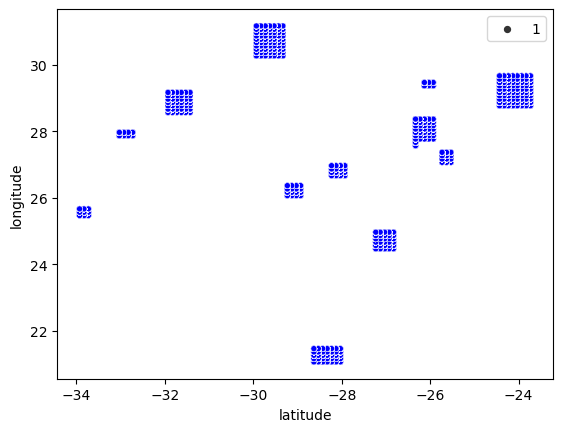

In [20]:
# plt.set_style('bmh')
sns.scatterplot(data = train,x = 'latitude' ,y = 'longitude', size=1,color = 'blue');

test locations

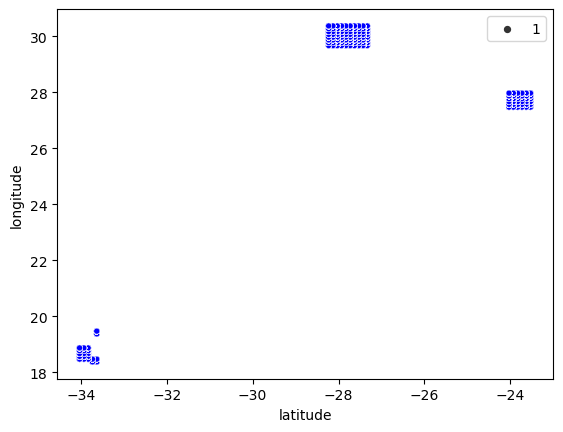

In [21]:
# plt.set_style('bmh')
sns.scatterplot(data = test,x = 'latitude' ,y = 'longitude', size=1,color = 'blue');

How are the sensor location located? Near or far to each other
* It is clear test and train all come from different distributions
* Different provinces different readings?
* Same country same readings?
* but some test locations are near some train locations so we can cluster them for FE

In [22]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [23]:
 [col for col in train.columns if 'humidity' in col or 'temperature' in col]

['Ozone_O3_effective_temperature']

<AxesSubplot:xlabel='Ozone_O3_effective_temperature', ylabel='emission'>

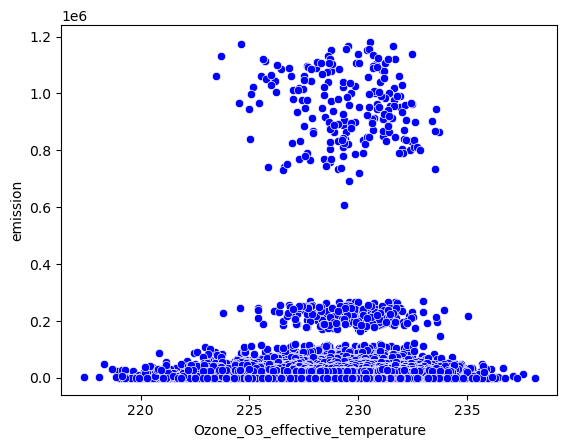

In [24]:
sns.scatterplot(y = 'emission', x = 'Ozone_O3_effective_temperature', data = train,color = 'blue')

Any relationships really?

In [25]:
print(train['location'].nunique())

767


In [26]:
print(test['location'].nunique())

287


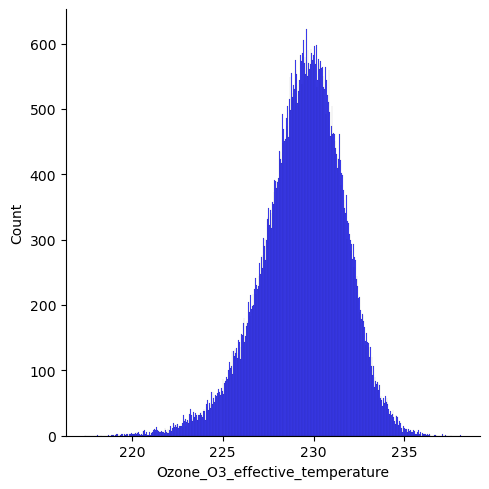

In [27]:
sns.displot(train['Ozone_O3_effective_temperature'],bins = 500,color = 'blue');

The distribution is it that bad really? No

#### Target Distribution

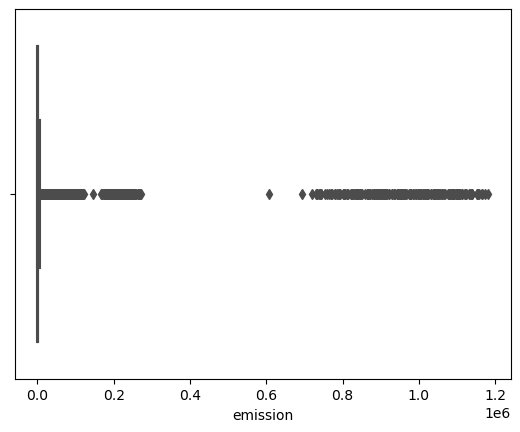

In [28]:
sns.boxplot(x = 'emission', data = train,color = 'blue');

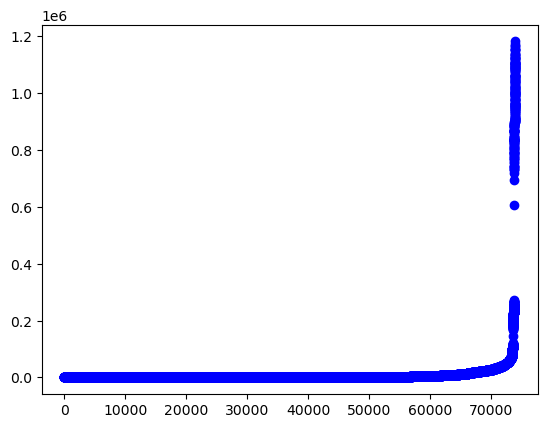

In [29]:
plt.scatter(range(train.shape[0]), np.sort(train['emission'].values),color = 'blue');

Outliers?
* Why the gap?


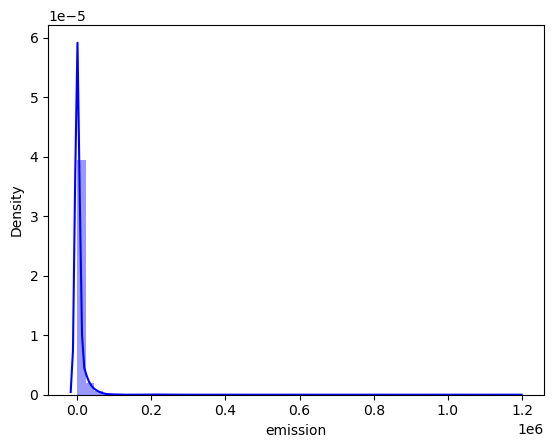

In [30]:
sns.distplot(train['emission'],color = 'blue');

### Power Transform the Target

<AxesSubplot:ylabel='Count'>

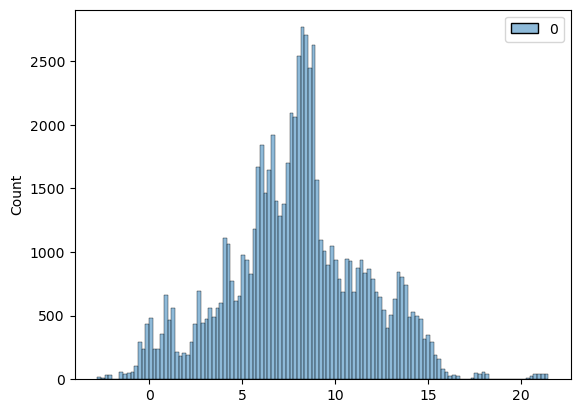

In [31]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method="box-cox", standardize=False)
sns.histplot(transformer.fit_transform(train['emission'].values.reshape(-1, 1)), color="blue")

<AxesSubplot:ylabel='Count'>

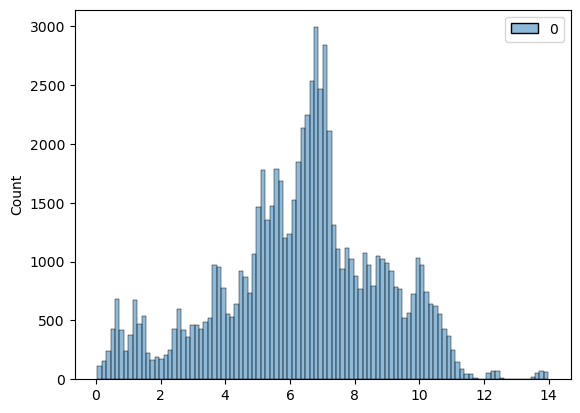

In [32]:
sns.histplot(np.log1p(train['emission'].values.reshape(-1, 1)), color="blue")

Looks really goood after power transforming
* should we power transform it then transform it back?
* Log transform also does the trick

<AxesSubplot:>

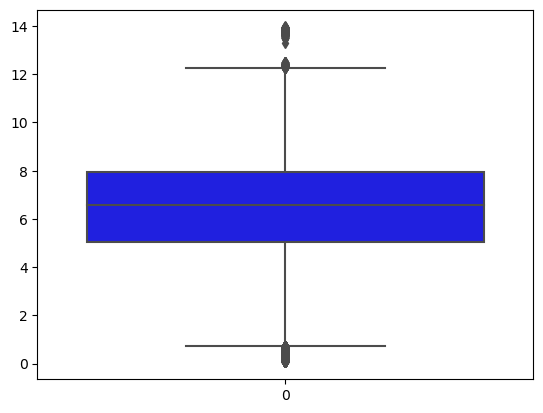

In [33]:
sns.boxplot(np.log1p(train['emission'].values.reshape(-1, 1)), color="blue")

Visualizing all numerical data

In [34]:
num_cols = [col for col in train.select_dtypes(['int','float']) if col not in ['emission', 'latitude','longitude','year','week_no']]
# num_cols


In [35]:
# for col in num_cols:
#     sns.displot(train[col], bins = 500)

### Understanding the Trend

we have been given the week and year
* seems the goal is to predict weekly emissions
* We can also add the month 


In [36]:
train['week_no'].nunique()

52

In [37]:
import datetime

def getMonth(year: int, week: int) -> int:
    """Return the month number in the given week in the given year."""
    return datetime.datetime.strptime(f'{year}-W{week}-1', "%Y-W%W-%w").month



# Apply the function to each row and add the result as a new column
for df in (train, test):
    df['Month'] = df.apply(lambda x: getMonth(x['year'], x['week_no']), axis=1)


display(train.head(2), test.head(2))




ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.73_28.77_2019_1    -23.73      28.77  2019        1   
1  ID_-23.73_28.77_2019_2    -23.73      28.77  2019        2   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000167   
1                                 -0.000155   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.713172   
1                                      0.812910   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000102   
1                                       -0.000137   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.223929                            24.939440   
1                       0.080281                            16.624162   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           56.896198                           -89.54503   
1                           31.137265                           -88.95653   

   SulphurDioxide_solar_zenith_angle  \
0                          17.991569   
1                          20.223611   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                       0.000033   
1                                      -0.000067   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.023408   
1                                 0.024189   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2829.881106                  2583.717282   
1                               2136.614929                  1864.319244   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   835381.851887                            24.227459   
1                   836015.109375                           -14.290228   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                           56.937397                          -89.606501   
1                           27.514546                          -90.409693   

   CarbonMonoxide_solar_zenith_angle  \
0                          18.019698   
1                          23.053571   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000057   
1                                   0.000069   

   NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                           0.000016        
1                                           0.000029        

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000041         
1                                           0.000040         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000127   
1                                         0.000131   

   NitrogenDioxide_tropopause_pressure  \
0                          9904.580385   
1                          8935.897092   

   NitrogenDioxide_absorbing_aerosol_index  NitrogenDioxide_cloud_fraction  \
0                                -1.668380                        0.080565   
1                                -1.347168                        0.063770   

   NitrogenDioxide_sensor_altitude  NitrogenDioxide_sensor_azimuth_angle  \
0                    835960.031250                            -13.285625   
1                    835799.541667                             16.624162   

   NitrogenDioxide_sensor_zenith_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            45.229958                           -92.185623   
1                            31.137265                           -88.956530   

   NitrogenDioxide_solar_zenith_angle  \
0                           22.836521   
1                           20.223611   

   Formaldehyde_tropospheric_HCHO_column_number

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.53_27.47_2019_1    -23.53      27.47  2019        1   
1  ID_-23.53_27.47_2019_2    -23.53      27.47  2019        2   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000077   
1                                  0.000181   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.454468   
1                                      0.423171   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000034   
1                                        0.000062   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.114291                           -80.286309   
1                       0.075100                           -17.765690   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           55.548961                          -94.964386   
1                           56.321248                          -89.763833   

   SulphurDioxide_solar_zenith_angle  \
0                          30.229884   
1                          23.313511   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                       0.000015   
1                                       0.000024   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.025937   
1                                 0.025041   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               2343.109252                  1303.421296   
1                               2187.909800                   347.591639   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   836310.926686                           -80.525540   
1                   836017.160096                           -56.480581   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                           50.020040                          -94.822642   
1                           35.874919                          -91.053865   

   CarbonMonoxide_solar_zenith_angle  \
0                          29.510213   
1                          24.333551   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000069   
1                                   0.000080   

   NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                           0.000027        
1                                           0.000039        

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000041         
1                                           0.000041         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000153   
1                                         0.000160   

   NitrogenDioxide_tropopause_pressure  \
0                          9662.019782   
1                          8705.951365   

   NitrogenDioxide_absorbing_aerosol_index  NitrogenDioxide_cloud_fraction  \
0                                -1.133541                        0.081843   
1                                -1.237256                        0.042643   

   NitrogenDioxide_sensor_altitude  NitrogenDioxide_sensor_azimuth_angle  \
0                    835956.054688                            -35.601709   
1                    835157.398416                             50.374223   

   NitrogenDioxide_sensor_zenith_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            56.745405                           -92.732373   
1                            55.107811                           -85.736668   

   NitrogenDioxide_solar_zenith_angle  \
0                           24.507811   
1                           14.604684   

   Formaldehyde_tropospheric_HCHO_column_number

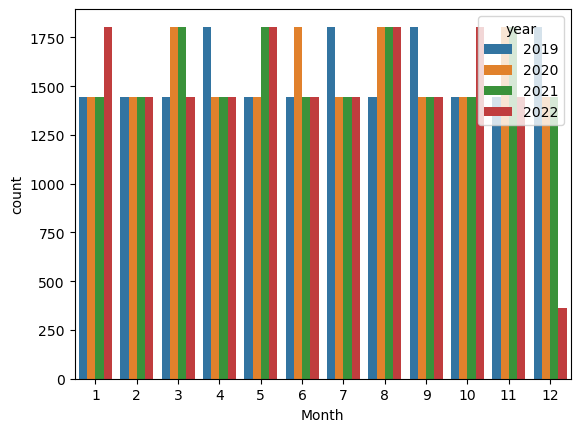

In [38]:
sns.countplot(x = 'Month', hue ='year' , data = train);

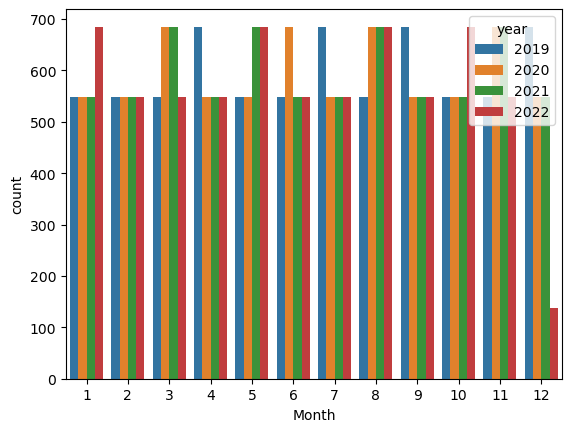

In [39]:
sns.countplot(x = 'Month', hue ='year' , data = test);

If we have the same years in both train and test then is this a timeseries problem?
* I dont think so
* Train and Test Have similar monthly and yearly distributions meaning the data has been split using this feature
* Also add different locations meaning we should have a similar cv scheme to that keep that it mind

In [40]:
train.shape, test.shape

((74005, 71), (28085, 70))

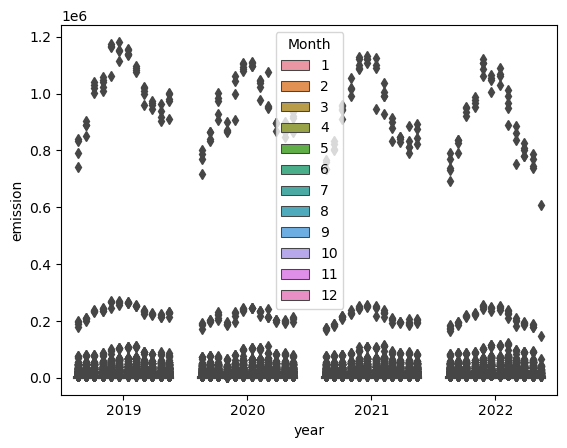

In [41]:
sns.boxplot(hue = 'Month', y = 'emission', data = train, x = 'year');

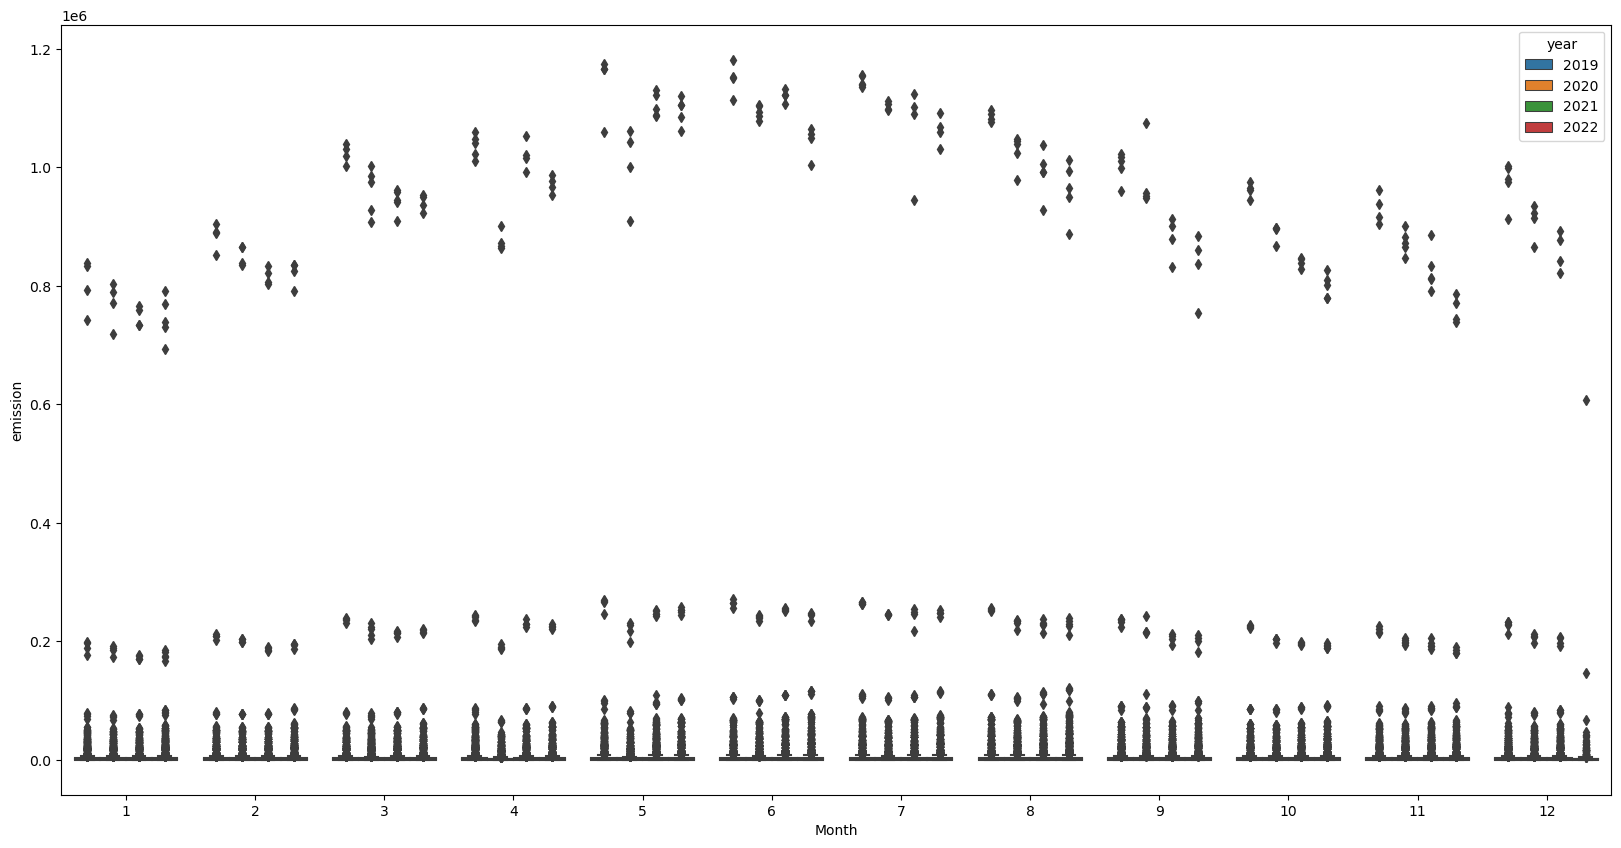

In [42]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Month', y = 'emission', data = train, hue = 'year');

clearly this data is trendy right?
* I believe there is a cyclical trend in this data. Observe January and December, they seem to have the lowest emissions reading while april, may, june, july are the highest. Can we create a feature that clearly explains this?


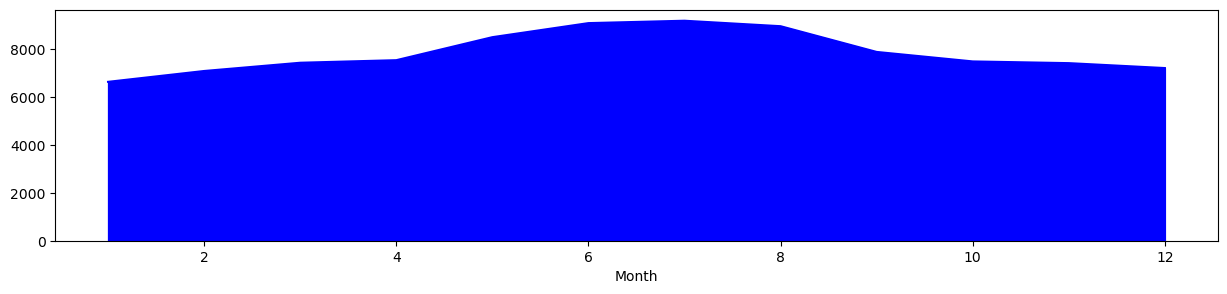

In [43]:
plt.figure(figsize = (15,3))
train.groupby('Month')['emission'].mean().plot(kind = 'area', color = 'blue');

This shows the trend clearly
* january - april, april to september, september - december

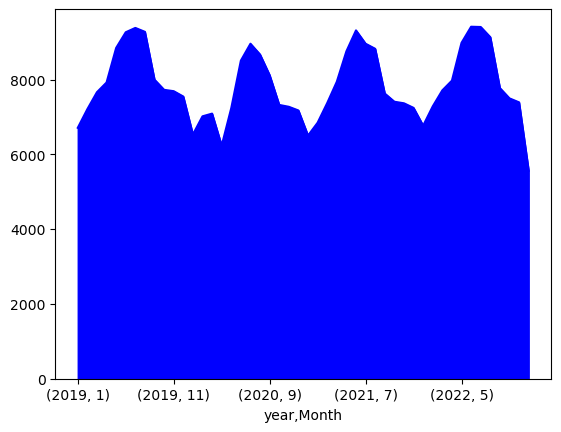

In [44]:
train.groupby(['year','Month'])['emission'].mean().plot(kind = 'area',color = 'blue');

Notice the yearly trend?
* amazing

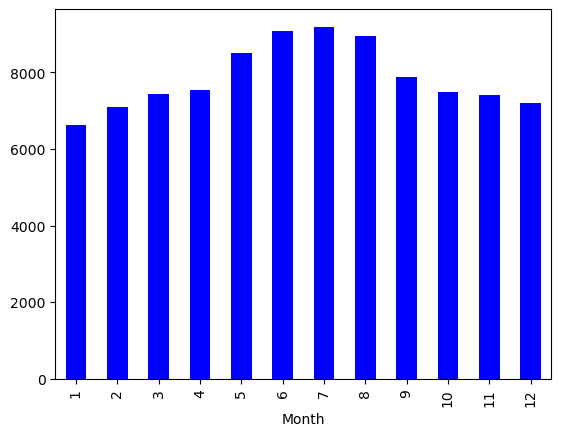

In [45]:
train.groupby('Month')['emission'].mean().plot(kind = 'bar',color = 'blue');

* bins 1,2,3,4 - 5,6,7,8 - 9,10,11,12

In [46]:
# Define the bin edges
bins = [0, 4, 8, 12]

# Define the bin labels
labels = ['Jan_April', 'May_August', 'Sep_Dec']

# Add a new column with the bin labels
for df in (train, test):
    df['bin'] = pd.cut(df['Month'], bins=bins, labels=labels)

display(train[['Month','bin']].sample(3))

Month         bin
6960      10     Sep_Dec
36693     11     Sep_Dec
64440      5  May_August

Let us investigate for one place at a time

In [47]:
train['location'].head()

0     -23.72999999999353_28.769999999988148
1    -23.729999999993534_28.769999999988148
2    -23.729999999993534_28.769999999988148
3    -23.729999999993534_28.769999999988148
4     -23.72999999999353_28.769999999988148
Name: location, dtype: object

In [48]:
loc_1 = train[train['location'] == '-23.72999999999353_28.769999999988148']

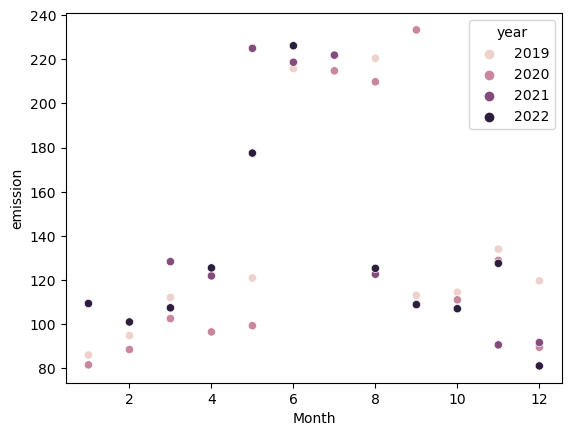

In [49]:
sns.scatterplot(data = loc_1,x = 'Month' ,hue = 'year',y = 'emission');

location1: Follows the afro-mentioned trend, amazing
* We can study this trend and use it for our rolling means

Count encoding the locations

In [50]:
from category_encoders import CountEncoder
cat_features = ['location']
count_encoder = CountEncoder(cols=cat_features)
count_encoder.fit(train[cat_features])
train = train.join(count_encoder.transform(train[cat_features]).add_suffix('_count'))
count_encoder.fit(test[cat_features])
test = test.join(count_encoder.transform(test[cat_features]).add_suffix('_count'))

In [51]:
alldata = pd.concat([train,test])
alldata = alldata.sort_values(['location','year','week_no'])
display(alldata.head(), alldata.tail())


ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0    ID_-23.53_27.47_2019_1    -23.53      27.47  2019        1   
4    ID_-23.53_27.47_2019_5    -23.53      27.47  2019        5   
8    ID_-23.53_27.47_2019_9    -23.53      27.47  2019        9   
17  ID_-23.53_27.47_2019_18    -23.53      27.47  2019       18   
21  ID_-23.53_27.47_2019_22    -23.53      27.47  2019       22   

    SulphurDioxide_SO2_column_number_density  \
0                                   0.000077   
4                                   0.000193   
8                                   0.000236   
17                                  0.001175   
21                                  0.001887   

    SulphurDioxide_SO2_column_number_density_amf  \
0                                       0.454468   
4                                       0.783044   
8                                       0.481039   
17                                      0.360350   
21                                      0.389023   

    SulphurDioxide_SO2_slant_column_number_density  \
0                                         0.000034   
4                                         0.000141   
8                                         0.000107   
17                                        0.000414   
21                                        0.000727   

    SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                        0.114291                           -80.286309   
4                        0.161142                             4.750356   
8                        0.121613                           -88.474751   
17                       0.170762                           -14.274674   
21                       0.107348                           -13.364899   

    SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                            55.548961                          -94.964386   
4                            38.097226                          -76.276115   
8                            59.717988                          -69.982879   
17                           63.249723                          -35.671434   
21                           27.921139                          -30.894698   

    SulphurDioxide_solar_zenith_angle  \
0                           30.229884   
4                           22.021292   
8                           36.613279   
17                          48.744017   
21                          52.034024   

    SulphurDioxide_SO2_column_number_density_15km  \
0                                        0.000015   
4                                        0.000065   
8                                        0.000027   
17                                       0.000142   
21                                       0.000286   

    CarbonMonoxide_CO_column_number_density  \
0                                  0.025937   
4                                  0.023576   
8                                  0.025630   
17                                 0.022832   
21                                 0.023821   

    CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                2343.109252                  1303.421296   
4                                1994.881499                   942.685331   
8                                1875.682658                  1044.641474   
17                                682.006750                    90.538852   
21                               1117.281800                   885.915393   

    CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    836310.926686                           -80.525540   
4                    835760.436946                             2.709358   
8                    835848.156250                           -14.376048   
17                   835737.505420                           -14.297420   
21                   835904.248346                           -24.312114   



ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
28080  ID_-34.03_18.87_2022_45    -34.03      18.87  2022       45   
28081  ID_-34.03_18.87_2022_46    -34.03      18.87  2022       46   
28082  ID_-34.03_18.87_2022_47    -34.03      18.87  2022       47   
28083  ID_-34.03_18.87_2022_48    -34.03      18.87  2022       48   
28084  ID_-34.03_18.87_2022_52    -34.03      18.87  2022       52   

       SulphurDioxide_SO2_column_number_density  \
28080                                  0.000464   
28081                                  0.000261   
28082                                 -0.000148   
28083                                  0.000288   
28084                                  0.000082   

       SulphurDioxide_SO2_column_number_density_amf  \
28080                                      0.423735   
28081                                      0.584277   
28082                                      0.472539   
28083                                      0.579029   
28084                                      1.034386   

       SulphurDioxide_SO2_slant_column_number_density  \
28080                                        0.000142   
28081                                        0.000112   
28082                                       -0.000079   
28083                                        0.000188   
28084                                        0.000085   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
28080                       0.249330                           -89.515608   
28081                       0.080017                           -13.920616   
28082                       0.201013                           -54.270785   
28083                       0.179293                          -104.564451   
28084                       0.267178                          -104.303131   

       SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
28080                           57.021675                          -77.656103   
28081                           15.655246                          -69.318024   
28082                           61.005878                          -76.737358   
28083                           41.673576                          -79.987427   
28084                           39.489784                          -78.493088   

       SulphurDioxide_solar_zenith_angle  \
28080                          42.348940   
28081                          31.427976   
28082                          36.870548   
28083                          36.436090   
28084                          31.781628   

       SulphurDioxide_SO2_column_number_density_15km  \
28080                                       0.000029   
28081                                       0.000057   
28082                                      -0.000032   
28083                                       0.000088   
28084                                       0.000039   

       CarbonMonoxide_CO_column_number_density  \
28080                                 0.021110   
28081                                 0.024011   
28082                                 0.018199   
28083                                 0.022877   
28084                                 0.016277   

       CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
28080                                911.610582                   262.955035   
28081                                984.817621                  1022.628151   
28082                                764.108575                   108.359219   
28083                               1129.408987                   897.850941   
28084                                855.064111                   114.920414   

       CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
28080                   840766.931796                           -77.181441   
28081                   840078.327264                           -24.396818   
28082                   840091.975922   

In [52]:
import plotly.express as px
fig = px.scatter_mapbox(
train, # Our DataFrame
lat='latitude',
lon='longitude',
width=600, # Width of map
height=600, # Height of map
# color= 'pm2_5',
hover_data=["location"],
# hover_name = "device"
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [53]:
X = alldata.loc[:,['latitude' ,'longitude']]
X = X.drop_duplicates()


In [54]:

from sklearn.metrics import silhouette_score
inertia = []
silhouette = []

for k in range(2,15):
    md = KMeans(n_clusters = k, random_state = 101)
    md.fit(X)
    inertia.append(md.inertia_)
    silhouette.append(silhouette_score(X, md.labels_))

In [55]:
inertia

[9029.29131440829,
 4703.400832532345,
 3191.6070920973966,
 1942.8121551915317,
 1584.9498200831147,
 956.5806652140321,
 610.9369096585162,
 407.18579854742813,
 284.41356439685455,
 182.28492874680205,
 155.13269329807255,
 130.65269329807535,
 111.28467410807063]

In [56]:
silhouette

[0.5173124095538122,
 0.5292841169455519,
 0.5757806232815225,
 0.6330471455881584,
 0.616285707288797,
 0.6464799690674868,
 0.7044135324591067,
 0.7394253599203932,
 0.7525851177418861,
 0.7721948237401943,
 0.7648168059255476,
 0.7724239723752282,
 0.7792179199800549]

A good clustering algorithm should result in low inertia and high silhouette scores
* indicating that the clusters are both compact and well-separated. We can experiment with different numbers of clusters and plot the corresponding inertia and silhouette scores to determine the optimal number of clusters that strikes a good balance between low inertia and high silhouette scores.

* 14 clusters has the lowest inertia of 111 and highest silhoutte score of 0.7792 
* we will add these clusters later
* Turns out it was not helpful as i was getting different clusters in the train and test 